In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### #2 Using pandas.read_html() gather the data from the UX Statistics website.



In [8]:
data = pd.read_html('https://www.zippia.com/user-experience-designer-jobs/demographics/')
len(data)


19

In [9]:
table_data = data[1]
table_data

,Year,Male,Female
0,2010,61.88%,38.12%
1,2011,62.12%,37.88%
2,2012,61.35%,38.65%
3,2013,63.67%,36.33%
4,2014,61.60%,38.40%
5,2015,62.31%,37.69%
6,2016,61.25%,38.75%
7,2017,60.32%,39.68%
8,2018,62.43%,37.57%
9,2019,59.38%,40.62%


##### #2 Continued. Create a DataFrame from the “User Experience Designer Gender by Year” data.
##### Convert the data to long-form using pandas.melt()

In [13]:
ux_data = pd.melt(
    table_data,
    id_vars='Year',
    value_vars=['Male', 'Female'],
    var_name='Gender',
    value_name='Percent'
)

In [14]:
ux_data

,Year,Gender,Percent
0,2010,Male,61.88%
1,2011,Male,62.12%
2,2012,Male,61.35%
3,2013,Male,63.67%
4,2014,Male,61.60%
5,2015,Male,62.31%
6,2016,Male,61.25%
7,2017,Male,60.32%
8,2018,Male,62.43%
9,2019,Male,59.38%


In [16]:
ux_data['Percent'] = ux_data['Percent'].str.rstrip('%').astype('float')

In [17]:
ux_data

,Year,Gender,Percent
0,2010,Male,61.88
1,2011,Male,62.12
2,2012,Male,61.35
3,2013,Male,63.67
4,2014,Male,61.60
5,2015,Male,62.31
6,2016,Male,61.25
7,2017,Male,60.32
8,2018,Male,62.43
9,2019,Male,59.38


In [18]:
ux_data = ux_data.astype({
    'Year': 'category',
    'Gender': 'category',

})

In [19]:
year_gender_group = ux_data.groupby(['Year', 'Gender'])

#### #3 In a new code cell, using Matplotlib, create and show a figure that includes one axis with a stacked horizontal bar plot of the ‘male’ and ‘female’ variables across ‘year’

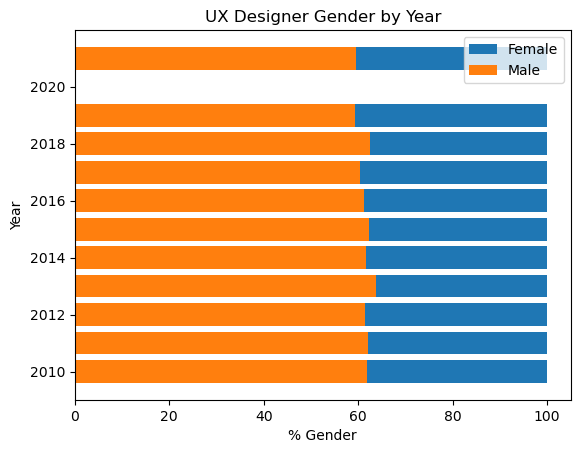

In [25]:
fig_1, ax_1=plt.subplots()

for idx, o in year_gender_group:
    if o.Gender.item() == 'Male':
        ax_1.barh(o.Year, o.Percent, left=0, label='Male', color="tab:orange")
    else:
        start_loc = 100 - o.Percent
        ax_1.barh(o.Year, o.Percent, left=start_loc, label='Female', color="tab:blue")

ax_1.legend(['Female','Male'])

ax_1.set(xlabel='% Gender', ylabel='Year', title='UX Designer Gender by Year')

plt.show()


#### #4 In a new code cell, using Seaborn, find a similar visualization style and plot the same data.


[Text(0.5, 0, '% Gender'),
 Text(0, 0.5, 'Year'),
 Text(0.5, 1.0, 'UX Designer Gender by Year')]

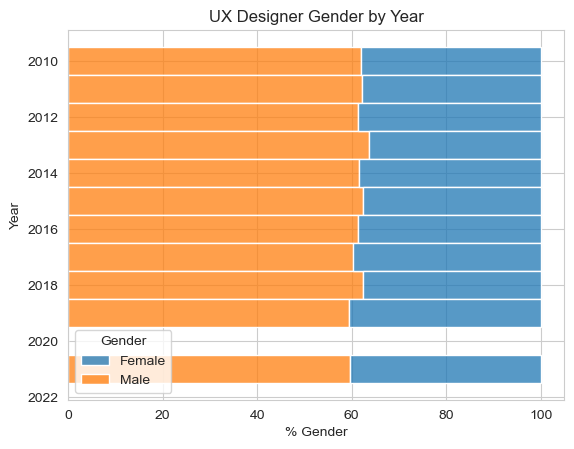

In [42]:
fig_2, ax_2 = plt.subplots()

sns.set_style('whitegrid')


sns.histplot(ux_data, y='Year', hue='Gender', weights='Percent', multiple='stack')
ax_2.set(xlabel='% Gender', ylabel='Year', title='UX Designer Gender by Year')

#### In a new markdown cell, describe your experience and what similarities and differences you noticed while using matplotlib and seaborn. Describe a situation where seaborn would be preferred and the type of data you might find.

- It was interesting looking at the differences between the two, expecially if you are not as "in the groove" with building out all the matlplotlib fidly bits, Seaborn makes life a lot easier.  When you don't have as much experience, Seaborn would definately be more preferred -- assuming you can determine the specific options needed.